<a href="https://colab.research.google.com/github/RafsanJany-44/NLP_Research/blob/master/tensoreflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade nbformat

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv("Main_Result.csv")

In [3]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4531,is wondering y Mother Nature is making my life...,0.0
4532,"ouch, thats your achy back...so sorry ... i d...",0.0
4533,One lane stop and go trafffffffic suckssss! Al...,0.0
4534,the dog dug a hole in the backyard well iwas s...,0.0


In [4]:
df["Type"].value_counts()

1.0    2326
0.0    2002
Name: Type, dtype: int64

In [5]:
df.isnull().sum()

Comments     17
Type        208
dtype: int64

In [6]:

df = df.dropna().reset_index(drop=True)

In [7]:
df.isnull().sum()

Comments    0
Type        0
dtype: int64

In [8]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4310,is wondering y Mother Nature is making my life...,0.0
4311,"ouch, thats your achy back...so sorry ... i d...",0.0
4312,One lane stop and go trafffffffic suckssss! Al...,0.0
4313,the dog dug a hole in the backyard well iwas s...,0.0


In [9]:

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [10]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Remove Non-Alphabetic Characters (including numbers)

In [12]:
import re

def convert_to_string(DF):
    DF["Comments"]= DF["Comments"].astype(str)
    
def cleanerFn(b):
    # keeps only words with alphabetic characters in comments
    for row in range(len(b)):
        line = b.loc[row, "Comments"]
        b.loc[row,"Comments"] = re.sub("[^a-zA-Z]", " ", line)

In [13]:
convert_to_string(df)

In [14]:
cleanerFn(df)
df.head()

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing so is chemistry i really real...,1.0
2,thanks khan academy wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0


In [15]:

sentences = []
labels = []

for i in range(df.shape[0]):
    sentences.append(df['Comments'][i])
    labels.append(df['Type'][i])

In [16]:
training_size = 3600
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [17]:
vocab_size = 10000                                #the maximum number of words to keep
embedding_dim = 16                                #input shape of neuralnetwork
max_length = 200                                  #maximum length of all sequences.
trunc_type='post'                                 # remove values from sequences larger than maxlen
padding_type='post'                               #pad either before or after each sequence.
oov_tok = "<OOV>"                                 #used to replace out-of-vocabulary words during text_to_sequence calls



tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#Transforms each text in texts to a sequence of integers. -> training data
training_sequences = tokenizer.texts_to_sequences(training_sentences)           

#This function transforms a list  of sequences into a 2D Numpy array of shape -> Training data
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    


#Transforms each text in texts to a sequence of integers. -> testing data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#This function transforms a list  of sequences into a 2D Numpy array of shape -> testing data
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# BERT Model

In [19]:
from transformers import BertTokenizer, TFBertForSequenceClassification
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

c:\Users\RAZER\anaconda3\envs\Viper\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model_bert.summary()


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [21]:


# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [22]:
num_epochs = 10
history = model_bert.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
113/113 - 90s - loss: 0.6527 - accuracy: 0.6383 - val_loss: 1.2132 - val_accuracy: 0.0070 - 90s/epoch - 796ms/step
Epoch 2/10
113/113 - 74s - loss: 0.6622 - accuracy: 0.6258 - val_loss: 0.9238 - val_accuracy: 0.0070 - 74s/epoch - 658ms/step
Epoch 3/10
113/113 - 75s - loss: 0.6393 - accuracy: 0.6381 - val_loss: 0.8918 - val_accuracy: 0.0070 - 75s/epoch - 666ms/step
Epoch 4/10
113/113 - 73s - loss: 0.5288 - accuracy: 0.6939 - val_loss: 1.0464 - val_accuracy: 0.4014 - 73s/epoch - 648ms/step
Epoch 5/10
113/113 - 74s - loss: 0.3237 - accuracy: 0.8706 - val_loss: 0.5578 - val_accuracy: 0.7524 - 74s/epoch - 659ms/step
Epoch 6/10
113/113 - 75s - loss: 0.1851 - accuracy: 0.9319 - val_loss: 0.2900 - val_accuracy: 0.9231 - 75s/epoch - 663ms/step
Epoch 7/10
113/113 - 74s - loss: 0.1259 - accuracy: 0.9564 - val_loss: 0.6227 - val_accuracy: 0.7832 - 74s/epoch - 656ms/step
Epoch 8/10
113/113 - 75s - loss: 0.1058 - accuracy: 0.9619 - val_loss: 0.1440 - val_accuracy: 0.9692 - 75s/epoch - 664

In [23]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.8281111180782318


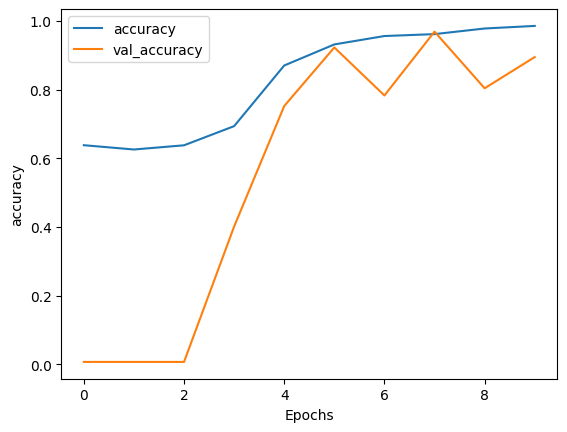

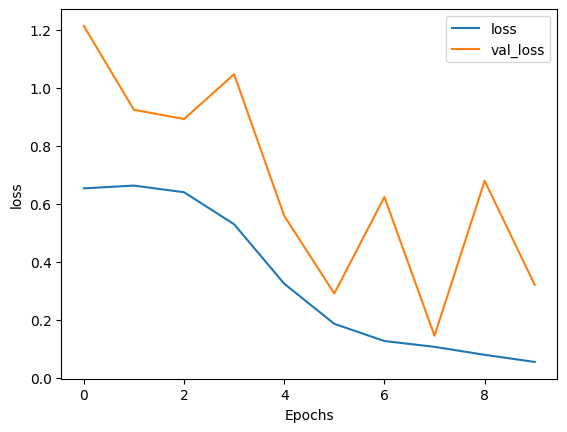

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Bidirectional LSTM

In [25]:
import keras 
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

bi_lstm_model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
bi_lstm_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 204,593
Trainable params: 204,593
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 10
history = bi_lstm_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
113/113 - 8s - loss: 0.5148 - accuracy: 0.7419 - val_loss: 0.2686 - val_accuracy: 0.9413 - 8s/epoch - 73ms/step
Epoch 2/10
113/113 - 4s - loss: 0.1618 - accuracy: 0.9486 - val_loss: 0.4010 - val_accuracy: 0.8084 - 4s/epoch - 33ms/step
Epoch 3/10
113/113 - 3s - loss: 0.0867 - accuracy: 0.9758 - val_loss: 0.1059 - val_accuracy: 0.9622 - 3s/epoch - 30ms/step
Epoch 4/10
113/113 - 4s - loss: 0.0426 - accuracy: 0.9900 - val_loss: 0.1442 - val_accuracy: 0.9441 - 4s/epoch - 34ms/step
Epoch 5/10
113/113 - 4s - loss: 0.0242 - accuracy: 0.9953 - val_loss: 0.3138 - val_accuracy: 0.8881 - 4s/epoch - 37ms/step
Epoch 6/10
113/113 - 4s - loss: 0.0177 - accuracy: 0.9964 - val_loss: 0.2308 - val_accuracy: 0.9189 - 4s/epoch - 33ms/step
Epoch 7/10
113/113 - 3s - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.2673 - val_accuracy: 0.9175 - 3s/epoch - 30ms/step
Epoch 8/10
113/113 - 5s - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.1770 - val_accuracy: 0.9385 - 5s/epoch - 43ms/step
Epoch 9/10
113/1

In [27]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9639722228050231


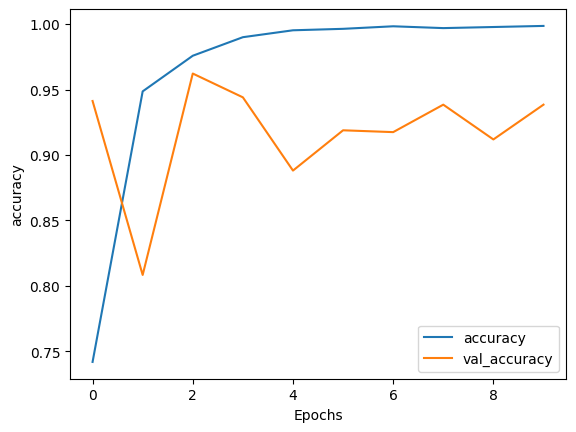

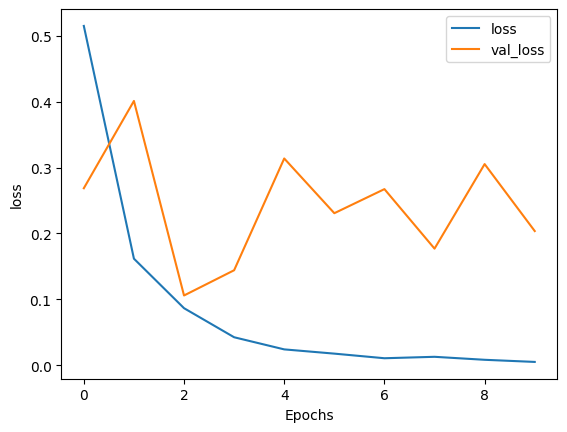

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Simple ANN

In [29]:

ann_model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(24, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 30
history = ann_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
113/113 - 1s - loss: 0.6658 - accuracy: 0.6375 - val_loss: 1.0108 - val_accuracy: 0.0000e+00 - 1s/epoch - 12ms/step
Epoch 2/30
113/113 - 1s - loss: 0.6481 - accuracy: 0.6425 - val_loss: 1.0106 - val_accuracy: 0.0000e+00 - 646ms/epoch - 6ms/step
Epoch 3/30
113/113 - 1s - loss: 0.6396 - accuracy: 0.6425 - val_loss: 0.9667 - val_accuracy: 0.0000e+00 - 897ms/epoch - 8ms/step
Epoch 4/30
113/113 - 1s - loss: 0.6232 - accuracy: 0.6425 - val_loss: 0.8937 - val_accuracy: 0.0000e+00 - 945ms/epoch - 8ms/step
Epoch 5/30
113/113 - 1s - loss: 0.5842 - accuracy: 0.6428 - val_loss: 0.7946 - val_accuracy: 0.0434 - 801ms/epoch - 7ms/step
Epoch 6/30
113/113 - 1s - loss: 0.4817 - accuracy: 0.8133 - val_loss: 0.6092 - val_accuracy: 0.7315 - 756ms/epoch - 7ms/step
Epoch 7/30
113/113 - 1s - loss: 0.3577 - accuracy: 0.9317 - val_loss: 0.4402 - val_accuracy: 0.8951 - 833ms/epoch - 7ms/step
Epoch 8/30
113/113 - 1s - loss: 0.2666 - accuracy: 0.9464 - val_loss: 0.3709 - val_accuracy: 0.8895 - 916ms/epo

In [32]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9156111121177674


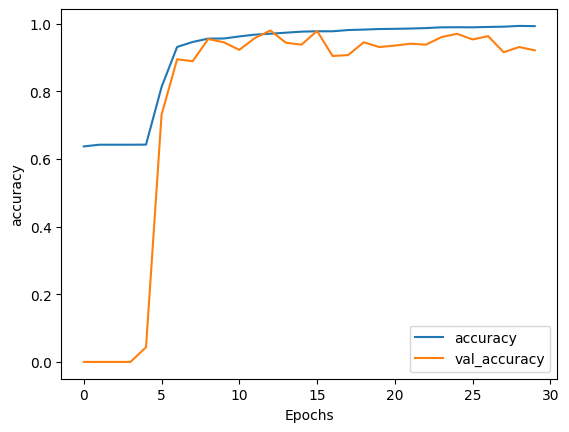

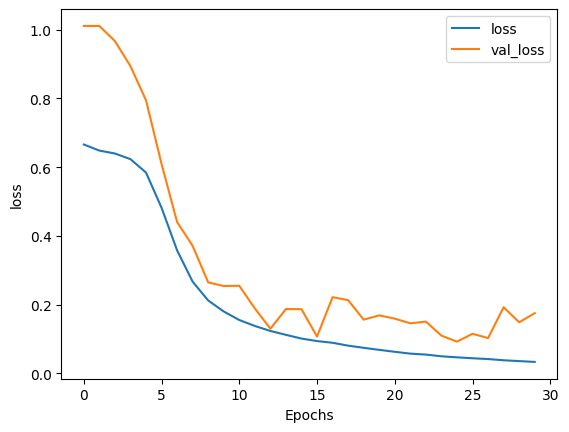

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
import keras
ann_model.save("ann.keras")
bi_lstm_model.save("bi_lstm_model.keras")


ann = keras.models.load_model("ann.keras")
bi_lstm = keras.models.load_model("bi_lstm_model.keras")

In [39]:
sentence = ["This is a very helpfull tutorial", "Very bad playlist and not hlpfull","good vedio","that was bad"," 3456 56345cool 4bro","dude, i was gone","Mindblowing tutorial"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
result1 = ann.predict(padded)
result2 = bi_lstm.predict(padded)



1/1 [==============================] - 0s 433ms/step


In [40]:
result1

array([[0.9963707 ],
       [0.3123289 ],
       [0.96697646],
       [0.06265064],
       [0.67726177],
       [0.33084244],
       [0.97319025]], dtype=float32)

In [42]:
result2
np.set_printoptions(suppress = True,formatter = {'float_kind':'{:f}'.format})

In [43]:
result2

array([[0.999742],
       [0.000076],
       [0.999807],
       [0.000115],
       [0.663630],
       [0.131676],
       [0.998364]], dtype=float32)